In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def normalize(data):
  mean = data.describe().loc["mean"]
  std = data.describe().loc["std"]
  data = (data - mean) / std
  return data

In [ ]:
path = "/content/IE440Final24ClusteringData.txt"
df = pd.read_csv(path, sep = "\t")
data = df.copy()
data[['x', "y"]] = normalize(data[["x", "y"]])

In [ ]:
def visualize(cluster_centers = None, points=data):
  plt.figure(figsize=(8, 6))
  for cls in points.Class.unique():
    class_set = points[points['Class'] == cls]
    plt.scatter(class_set['x'], class_set['y'], alpha=0.7)
  if cluster_centers is not None:
    plt.scatter(cluster_centers[0], cluster_centers[1], s=50, marker="s", c="k", label="Cluster Centers")
    K = len(cluster_centers.T)
    plt.title(f"K = {K}")
    plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

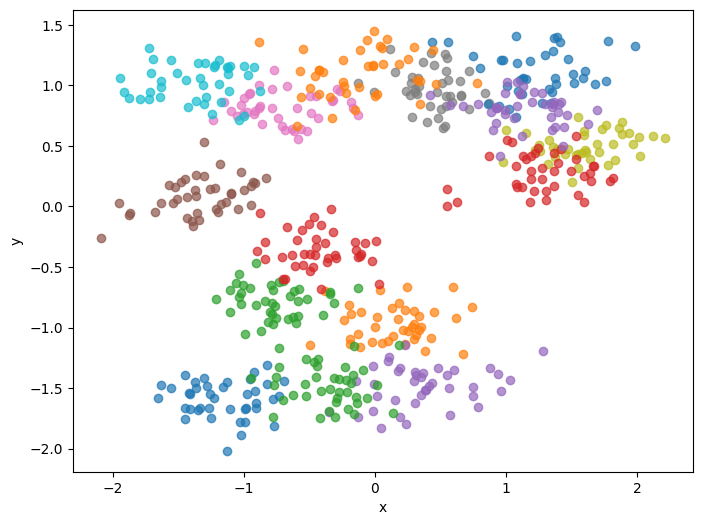

In [ ]:
visualize();

 Experiment for K = 5, 10 and 15 clusters.
 Use Gaussian Kernel as the neighborhood function. Do not use an explicit neighborhood.
 Plot the data and the final cluster centers.

In [ ]:
def som(data, I, alpha, beta, sigma, T=2000):

  # put patterns in random order
  data = data.sample(frac=1, axis=0).reset_index(drop=True)
  # number of patters
  P = len(data)
  X = data[["x", "y"]].to_numpy()
  # random weight initialization
  w = np.random.random(size=(I, 2))
  # epochs
  t = 0

  while t < T:
    for p in range(P):
      d_list = []
      for i in range(I):
        d = LA.norm(X[p] - w[i])
        d_list.append(d)
      ip = np.argmin(d_list)
      for i in range(I):
        # Gaussian Kernel as the neighborhood function
        numerator = LA.norm(w[i] - w[ip])
        gauss_kernel = np.exp(-(numerator**2)/(sigma**2))
        # delta for weights
        delta_w = alpha * gauss_kernel * (X[p] - w[i])
        # update the weights
        w[ip] += delta_w

    sigma *= beta
    alpha *= beta
    t += 1
  return w

In [ ]:
w_som = som(data, 15, 0.5, 0.99, 0.9)

In [ ]:
w_som

array([[-1.28370536, -1.6174307 ],
       [ 0.58778805, -1.39913983],
       [ 1.14942936,  0.36955055],
       [ 0.42680811,  1.03581809],
       [-0.81285503, -0.74649005],
       [-1.32398142,  0.08005889],
       [-0.14524453, -1.57341475],
       [ 1.68522663,  0.45817815],
       [ 1.2290555 ,  0.98791828],
       [-1.62874447,  1.02577756],
       [ 0.13034654, -1.00201024],
       [-0.36994568, -0.39713797],
       [-0.33906863,  0.93125041],
       [-0.71723389, -1.45474804],
       [-1.02910662,  0.93525509]])

In [ ]:
w_som = np.array([[-1.28370536, -1.6174307 ],
       [ 0.58778805, -1.39913983],
       [ 1.14942936,  0.36955055],
       [ 0.42680811,  1.03581809],
       [-0.81285503, -0.74649005],
       [-1.32398142,  0.08005889],
       [-0.14524453, -1.57341475],
       [ 1.68522663,  0.45817815],
       [ 1.2290555 ,  0.98791828],
       [-1.62874447,  1.02577756],
       [ 0.13034654, -1.00201024],
       [-0.36994568, -0.39713797],
       [-0.33906863,  0.93125041],
       [-0.71723389, -1.45474804],
       [-1.02910662,  0.93525509]])

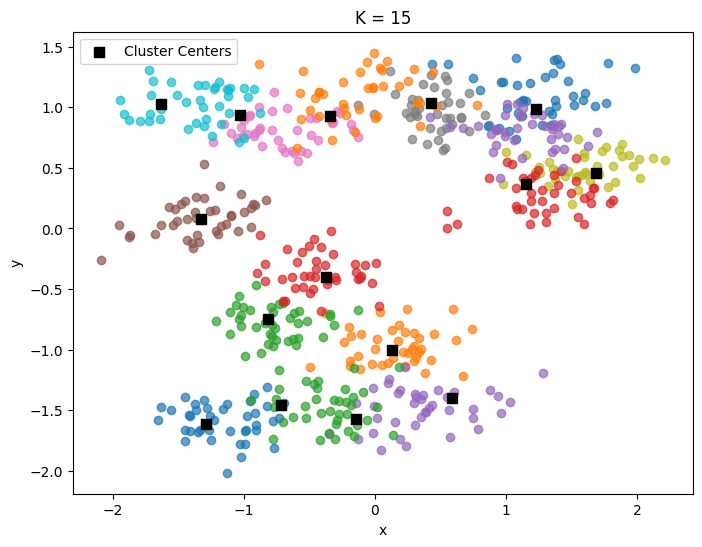

In [ ]:
visualize(cluster_centers = w_som.T)

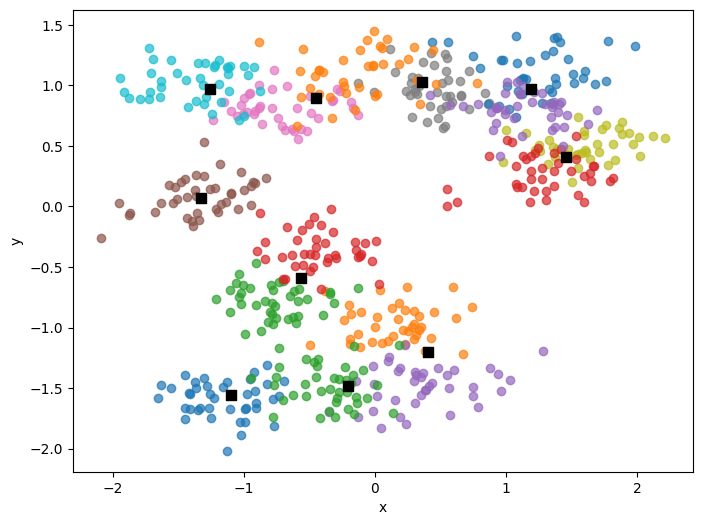

In [ ]:
w_som_5 = som(data, 5, 0.5, 0.99, 0.9)
visualize(cluster_centers = w_som_5.T)
w_som_10 = som(data, 10, 0.5, 0.99, 0.9)
visualize(cluster_centers = w_som_10.T)
w_som_15 = som(data, 15, 0.1, 0.99, 0.9)
visualize(cluster_centers = w_som_15.T)

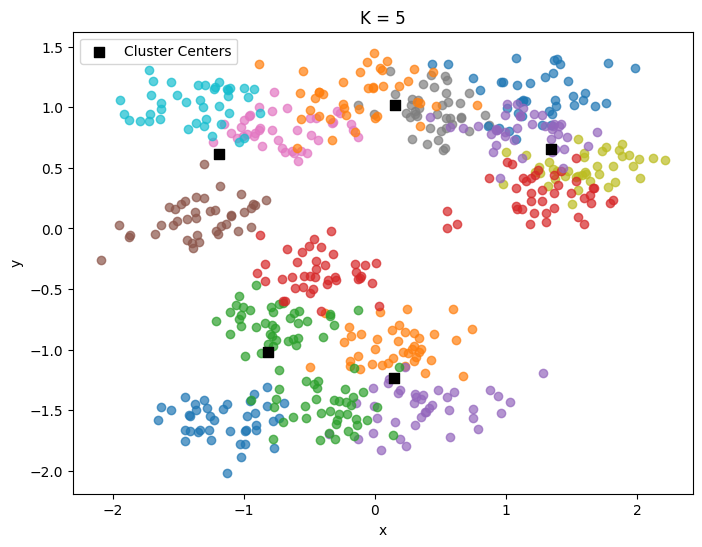

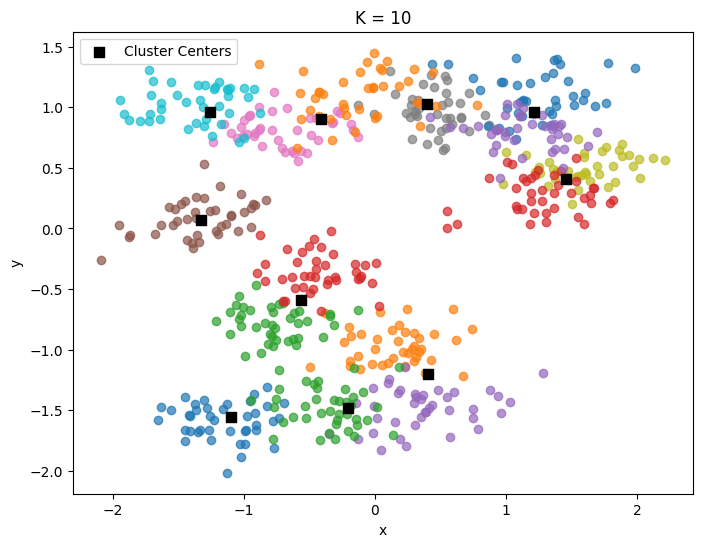

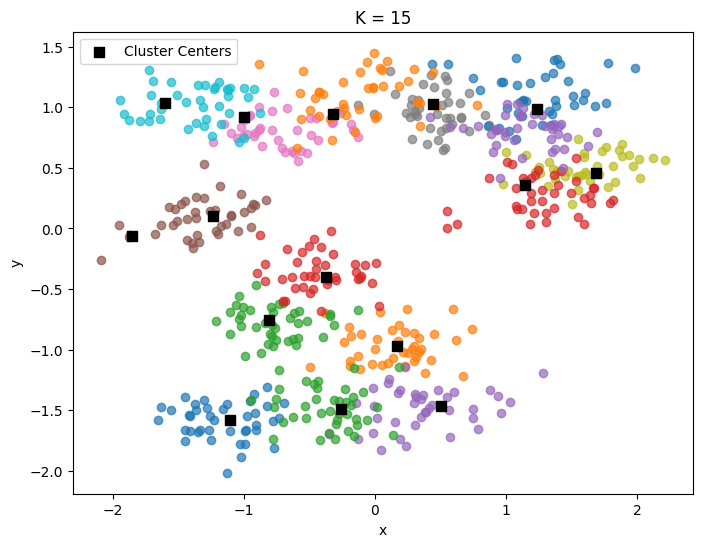

In [ ]:
w_som_5 = som(data, 5, 0.5, 0.99, 0.9)
visualize(cluster_centers = w_som_5.T)
w_som_10 = som(data, 10, 0.5, 0.99, 0.9)
visualize(cluster_centers = w_som_10.T)
w_som_15 = som(data, 15, 0.5, 0.99, 0.9)
visualize(cluster_centers = w_som_15.T)